In [1]:
from indianpines.dataset import load as load_pines
from s3vm_pines.module import recategorize_csv, train_test_split, colored_map, labeled_unlabeled_test_split

pines = load_pines(pca=20,recategorize_rule=recategorize_csv, include_background=True,gt_gic=False)

実験1では，Backgroundラベル10705インスタンスを除く10320インスタンスから，$10\%$をトレーニングデータとして選び，それをラベル付きとラベル無しに分割する(p:1-p）．トレーニングデータ以外の$90\%$を評価用のテストデータとする．

ここで，トレーニングデータは，無作為に選ばれたものではなく，ラベルごとに空間的に密集していることに注意されたい．これは土地被覆分類におけるアノテーションの特性を反映したものである．

トレーニングデータを @fig_train に示す．

In [2]:
prop_train = 1348/10320
print(prop_train)

status, status_name = train_test_split(prop_train=prop_train, recategorize_rule=recategorize_csv, gt_gic=False)

for i, s in enumerate(status_name):
    n = status[status==i].shape[0]
    print(f'{i}:{s}:{n}')

0.13062015503875968
8/54
327/2502
163/1244
64/489
530/4050
28/212
170/1294
50/380
13/95
0:background:10705
1:test:8967
2:training:1353


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'training data')

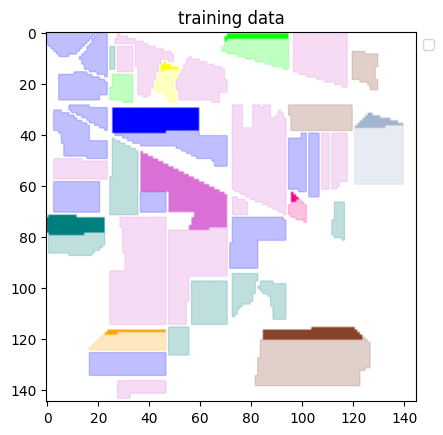

In [3]:
#| label: fig_train
#| fig-cap: "Selected Training Data"

from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colored_map(ax, pines.target[status==2], pines.cordinates[status==2], recategorize_rule=recategorize_csv, gt_gic=False)
ax.set_title('training data')

## ラベル付きトレーニングデータの割合に対する評価


In [ ]:
#| label: fig_test_with_various_labeled
#| fig-cap: "Testing with Various Labeled Data Proportion"
#| output: false

from qns3vm import QN_S3VM_OVR
from qns3vm.tools import classification_error
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import random
from matplotlib import style
style.use(['science','ieee'])


rg = random.Random()

seed_l = 83988848
seed_u = 83988848

prop_train_l_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

acc = list()
err = list()
f1 = list()
fig2 = plt.figure()
ax21 = [0 for _ in prop_train_l_list]
for i, prop_train_l in enumerate(prop_train_l_list):
    l_u_t_status, l_u_t_status_name = labeled_unlabeled_test_split(prop_train_l=prop_train_l,status=status,features=pines.features, target=pines.target, cordinates=pines.cordinates, unlabeled_type = 'from_train',seed_l=seed_l, seed_u=seed_u)

    for i, s in enumerate(l_u_t_status_name):
        n = l_u_t_status[l_u_t_status==i].shape[0]
        print(f'{i}:{s}:{n}')

    X_train_l = pines.features[l_u_t_status==3].tolist()
    L_train_l = pines.target[l_u_t_status==3].tolist()
    X_train_u = pines.features[l_u_t_status==2].tolist()
    X_test = pines.features[l_u_t_status==1].tolist()
    L_test = pines.target[l_u_t_status==1].tolist()

    ax21[i] = fig2.add_subplot(3,3,i)
    colored_map(ax21[i], L_train_l, pines.cordinates[l_u_t_status==3], recategorize_rule=recategorize_csv, gt_gic=False)
    ax21[i].set_title(f'{prop_train_l =}')

    clf = QN_S3VM_OVR(X_train_l, L_train_l, X_train_u, random_generator=rg, lam=0.008765625, lamU=0.8, sigma=0.5, kernel_type="RBF", estimate_r=0.0)
    clf.train()
    preds = clf.predict(X_test)
    err_ = classification_error(preds,L_test)
    acc_ = accuracy_score(L_test, preds)
    f1_ = f1_score(L_test, preds, average="micro")
    err.append(err_)
    acc.append(acc_)
    f1.append(f1_)

ax22 = fig2.add_subplot(3,3,9)
ax22.plot(prop_train_l_list, acc)
ax22.set_xlabel(r'Amount of Labeled Data [$\%$]')
ax22.set_ylabel(r'Accuracy Score[$\%$]')
ax22.set_title('Testing with Various Labeled Data Proportion')

0:background:10705
1:test:8967
2:unlabeled:1215
3:labeled:138


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1, 2, 3, 4, 5, 6, 7, 8, 9]
Dense model selected
lam : 1 -> 0.008765625
lamU : 1 -> 0.8
sigma : 1 -> 0.5
kernel_type : Linear -> RBF
estimate_r : None -> 0.0
Dense model selected
Dense model selected
Dense model selected
Dense model selected
Dense model selected
Dense model selected
Dense model selected
Dense model selected
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERM

[1, 2, 3, 4, 5, 6, 7, 8, 9]
Dense model selected
Dense model selected
Dense model selected
Dense model selected
Dense model selected
Dense model selected
Dense model selected
Dense model selected
Dense model selected
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task']

[1, 2, 3, 4, 5, 6, 7, 8, 9]
Dense model selected
Dense model selected
Dense model selected
Dense model selected
Dense model selected
Dense model selected
Dense model selected
Dense model selected
Dense model selected
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 0,d['task'] = 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnflag'] = 2,d['task'] = 'ABNORMAL_TERMINATION_IN_LNSRCH'
d['warnfla

@fig_test_with_various_labeled に示すようにラベル付きデータがトレーニングデータの20%以上のときにエラー率が低くなるので，20％に固定する．

その上で，ラベル無しデータの割合を10%から10％刻みで80%まで変えてみる．結果を @fig_test_with_various_unlabeled に示す．

In [ ]:
#| label: fig_test_with_various_unlabeled
#| fig-cap: "Testing with Various Unlabeled Data Proportion"
#| output: false

import numpy as np

prop_train_l = 0.2
prop_train_u_list = [0.1, 0.2, 0.3, 0.4 ,0.5, 0.6, 0.7, 0.8]

seed_l = 83988848
seed_u = 83988848

l_u_t_status, l_u_t_status_name = labeled_unlabeled_test_split(prop_train_l=prop_train_l,status=status,features=pines.features, target=pines.target, cordinates=pines.cordinates,unlabeled_type='from_train', seed_l=seed_l, seed_u=seed_u)

X_train_l = pines.features[l_u_t_status==3].tolist()
L_train_l = pines.target[l_u_t_status==3].tolist()
X_test = pines.features[l_u_t_status==1].tolist()
L_test = pines.target[l_u_t_status==1].tolist()

def select_unlabeled_in_proportion(prop_train_u,l_u_t_status,status,target):
    labels = sorted(list(set(target)))
    selected = np.zeros_like(l_u_t_status)
    for t in labels:
        idx = list()
        for i,ti in enumerate(target):
            if ti == t:
                if l_u_t_status[i] == 2:
                    idx.append(i)
        selected[idx] = 1
        n_train = len([1 for s in status if s == 2])
        n_selected = int(np.ceil(prop_train_u * n_train))
        selected[idx[:n_selected]] = 2
    selected_name = ['un-traininig_or_labeled', 'unselected_unlabeled', 'selected_unlabeled']
    return selected, selected_name

acc = list()
err = list()
f1 = list()
fig3 = plt.figure()
ax31 = [0 for _ in prop_train_u_list]
for i, prop_train_u in enumerate(prop_train_u_list):
    selected, selected_name = select_unlabeled_in_proportion(prop_train_u, l_u_t_status, status, target=pines.target)

    for i, s in enumerate(l_u_t_status_name):
        n = l_u_t_status[l_u_t_status==i].shape[0]
        if i == 2:
            n = selected[selected == 2].shape[0]
        print(f'{i}:{s}:{n}')

    X_train_u = pines.features[selected==2].tolist()

    ax31[i] = fig3.add_subplot(3,3,i)
    colored_map(ax31[i], pines.target[selected==2], pines.cordinates[selected==2], recategorize_rule=recategorize_csv, gt_gic=False)
    ax31[i].set_title(f'{prop_train_u =}')


    clf = QN_S3VM_OVR(X_train_l, L_train_l, X_train_u, random_generator=rg, lam=0.008765625, lamU=0.8, sigma=0.5, kernel_type="RBF", estimate_r=0.0)
    clf.train()
    preds = clf.predict(X_test)
    err_ = classification_error(preds,L_test)
    err.append(err_)
    acc_ = accuracy_score(L_test, preds)
    acc.append(acc)
    f1_ = f1_score(L_test, preds, average="micro")
    f1.append(f1_)

ax32 = fig3.add_subplot(3,3,9)
ax32.plot(prop_train_u_list, acc)
ax32.set_xlabel(r'Amount of Unlabeled Data [%%]')
ax32.set_ylabel(r'Accuracy Score [%%]')
ax32.set_title('Testing with Various Unlabeled Data Proportion')